# World Meteorological Organization

Loading Dataset

In [1]:
import pandas as pd

dataset = pd.read_csv('World_MO_Hurricane_Survival.csv')
print(dataset.head())

       ID         DOB   M_STATUS     SALARY       EDU_DATA    EMP_DATA  \
0  3345.0   7/22/1964    Married     0-100K  Post-Graduate  Unemployed   
1  3346.0    9/9/1981  Unmarried  300k-500k    High-School    Employed   
2  3347.0    5/8/1978    Married  100k-300k    High-School    Employed   
3  3348.0   6/21/1978  Unmarried  300k-500k       Graduate    Employed   
4  3349.0  12/14/1968  Unmarried  500k-700k    High-School  Unemployed   

  REL_ORIEN                 FAV_TV      PREF_CAR GENDER  ... FAV_COLR  \
0  Believer  How I Met your mother          Ford   Male  ...    Green   
1  Believer        Big Bang Theory  Daimler-Benz   Male  ...   Orange   
2  Believer                  Flash        Suzuki   Male  ...    White   
3  Agnostic                Friends          Audi   Male  ...    Green   
4  Agnostic           Prison Break           BMW   Male  ...    Black   

        NEWS_SOURCE DIST_FRM_COAST MNTLY_TRAVEL GEN_MOVIES   FAV_SUBJ  \
0    New York Times       10-25 KM   250-50

Checking for Null Value

In [2]:
print(dataset.isna().any())

ID                 True
DOB                True
M_STATUS           True
SALARY             True
EDU_DATA           True
EMP_DATA           True
REL_ORIEN          True
FAV_TV             True
PREF_CAR           True
GENDER             True
FAV_CUIS           True
FAV_MUSIC          True
ENDU_LEVEL         True
FAV_SPORT          True
FAV_COLR           True
NEWS_SOURCE        True
DIST_FRM_COAST     True
MNTLY_TRAVEL       True
GEN_MOVIES         True
FAV_SUBJ           True
ALCOHOL            True
FAV_SUPERHERO      True
Dist_Coast         True
Class             False
dtype: bool


Removing affected rows

In [3]:
dataset = dataset.dropna()
dataset.reset_index(drop=True, inplace=True)
print(dataset.isna().any())

ID                False
DOB               False
M_STATUS          False
SALARY            False
EDU_DATA          False
EMP_DATA          False
REL_ORIEN         False
FAV_TV            False
PREF_CAR          False
GENDER            False
FAV_CUIS          False
FAV_MUSIC         False
ENDU_LEVEL        False
FAV_SPORT         False
FAV_COLR          False
NEWS_SOURCE       False
DIST_FRM_COAST    False
MNTLY_TRAVEL      False
GEN_MOVIES        False
FAV_SUBJ          False
ALCOHOL           False
FAV_SUPERHERO     False
Dist_Coast        False
Class             False
dtype: bool


Separating feature and target

In [4]:
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]
X, y

(             DOB   M_STATUS     SALARY       EDU_DATA       EMP_DATA  \
 0      7/22/1964    Married     0-100K  Post-Graduate     Unemployed   
 1       9/9/1981  Unmarried  300k-500k    High-School       Employed   
 2       5/8/1978    Married  100k-300k    High-School       Employed   
 3      6/21/1978  Unmarried  300k-500k       Graduate       Employed   
 4     12/14/1968  Unmarried  500k-700k    High-School     Unemployed   
 ...          ...        ...        ...            ...            ...   
 4946    8/5/1962    Married  500k-700k       Graduate       Employed   
 4947   8/14/1982  Unmarried  300k-500k    High-School       Employed   
 4948   4/28/1972    Married  100k-300k    High-School       Employed   
 4949  11/11/1972    Married  100k-300k     Uneducated       Employed   
 4950    9/4/1972    Married     0-100K  Post-Graduate  Self-Employed   
 
      REL_ORIEN                 FAV_TV      PREF_CAR  GENDER  FAV_CUIS  ...  \
 0     Believer  How I Met your mother     

## Feature Engineering

Majority of the data is in categorical variable so it must be selected and processed in certain way

In [5]:
def encode_salary(x):
    if x == '0-100K':
        return 1
    elif x == '100k-300k':
        return 2
    elif x == '300k-500k':
        return 3
    elif x == '500k-700k':
        return 4
    elif x == '700k-1 Million':
        return 5
    elif x == '1M-2Million':
        return 6
    else:
        return x

def encode_edu_data(x):
    if x == 'Uneducated':
        return 0
    elif x == 'High-School':
        return 1
    elif x == 'Graduate':
        return 2
    elif x == 'Post-Graduate':
        return 3
    else:
        return x
    
def encode_endu_level(x):
    if x == '1 to 3':
        return 1
    elif x == '3 to 5':
        return 2
    elif x == '6 to 10':
        return 3
    elif x == '10 to 12':
        return 4
    elif x == '12 to 15':
        return 5
    elif x == '15-18':
        return 6
    elif x == '18-20':
        return 7
    elif x == '20+':
        return 8
    else:
        return x

def encode_mntly_travel(x):
    if x == '0-250 KM':
        return 1
    elif x == '250-500 KM':
        return 2
    elif x == '500-1000 KM':
        return 3
    elif x == '1000-1500 KM':
        return 4
    elif x == '1500-2000 KM':
        return 5
    elif x == '2000+ KM':
        return 6
    else:
        return x

def encode_dist_frm_coast(x):
    # ['10-25 KM', '60-80 KM', '0-10 KM', '25-40 KM', '40-60 KM']
    if x == '0-10 KM':
        return 1
    elif x == '10-25 KM':
        return 2
    elif x == '25-40 KM':
        return 3
    elif x == '40-60 KM':
        return 4
    elif x == '60-80 KM':
        return 5
    else:
        return x

In [6]:
X[['SALARY']] = [encode_salary(x) for x in X['SALARY']]
X[['EDU_DATA']] = [encode_edu_data(x) for x in X['EDU_DATA']]
X[['ENDU_LEVEL']] = [encode_endu_level(x) for x in X['ENDU_LEVEL']]
X[['MNTLY_TRAVEL']] = [encode_mntly_travel(x) for x in X['MNTLY_TRAVEL']]
X[['DIST_FRM_COAST']] = [encode_dist_frm_coast(x) for x in X['DIST_FRM_COAST']]

In [7]:
from datetime import date, datetime
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [8]:
X[['DOB']] = [calculate_age(datetime.strptime(x, '%m/%d/%Y')) for x in dataset['DOB']]
X = X.rename(columns={'DOB': 'AGE'})

In [9]:
object_cols = [col for col in X.columns if X[col].dtype == "object"]

object_nunique = list(map(lambda col: X[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

sorted(d.items(), key=lambda x: x[1])

[('M_STATUS', 3),
 ('EMP_DATA', 3),
 ('REL_ORIEN', 3),
 ('GENDER', 3),
 ('GEN_MOVIES', 7),
 ('ALCOHOL', 7),
 ('FAV_SUPERHERO', 7),
 ('FAV_MUSIC', 8),
 ('FAV_SPORT', 8),
 ('NEWS_SOURCE', 8),
 ('FAV_CUIS', 9),
 ('FAV_COLR', 9),
 ('FAV_TV', 10),
 ('FAV_SUBJ', 10),
 ('PREF_CAR', 14)]

Dari feature yang kita punya, dapat dilihat semua feature yang merupakan kategorical, disini kita akan memilih feature dibawah 7 kategori untuk di OneHotEncode, sedangkan sisanya di OrdinalEncode agar tidak terlalu banyak mengexpand dataset kita

In [10]:
low_cardinality_cols = ['M_STATUS', 'EMP_DATA', 'REL_ORIEN', 'GENDER']
high_cardinality_cols = ['GEN_MOVIES', 'ALCOHOL', 'FAV_SUPERHERO', 'FAV_MUSIC', 'FAV_SPORT', 'NEWS_SOURCE', 'FAV_CUIS', 'FAV_COLR', 'FAV_TV', 'FAV_SUBJ', 'PREF_CAR']

In [11]:
from sklearn.preprocessing import OneHotEncoder

for f in low_cardinality_cols:
    encoder = OneHotEncoder(sparse=False)
    feature_encoded = pd.DataFrame(encoder.fit_transform(X[[f]]))
    feature_encoded.columns = encoder.get_feature_names([f])
    X.drop([f], axis=1, inplace=True)
    X = pd.concat([X, feature_encoded], axis=1)

In [12]:
from sklearn.preprocessing import OrdinalEncoder

X[high_cardinality_cols] = OrdinalEncoder().fit_transform(X[high_cardinality_cols])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001851384A208>,
      dtype=object)

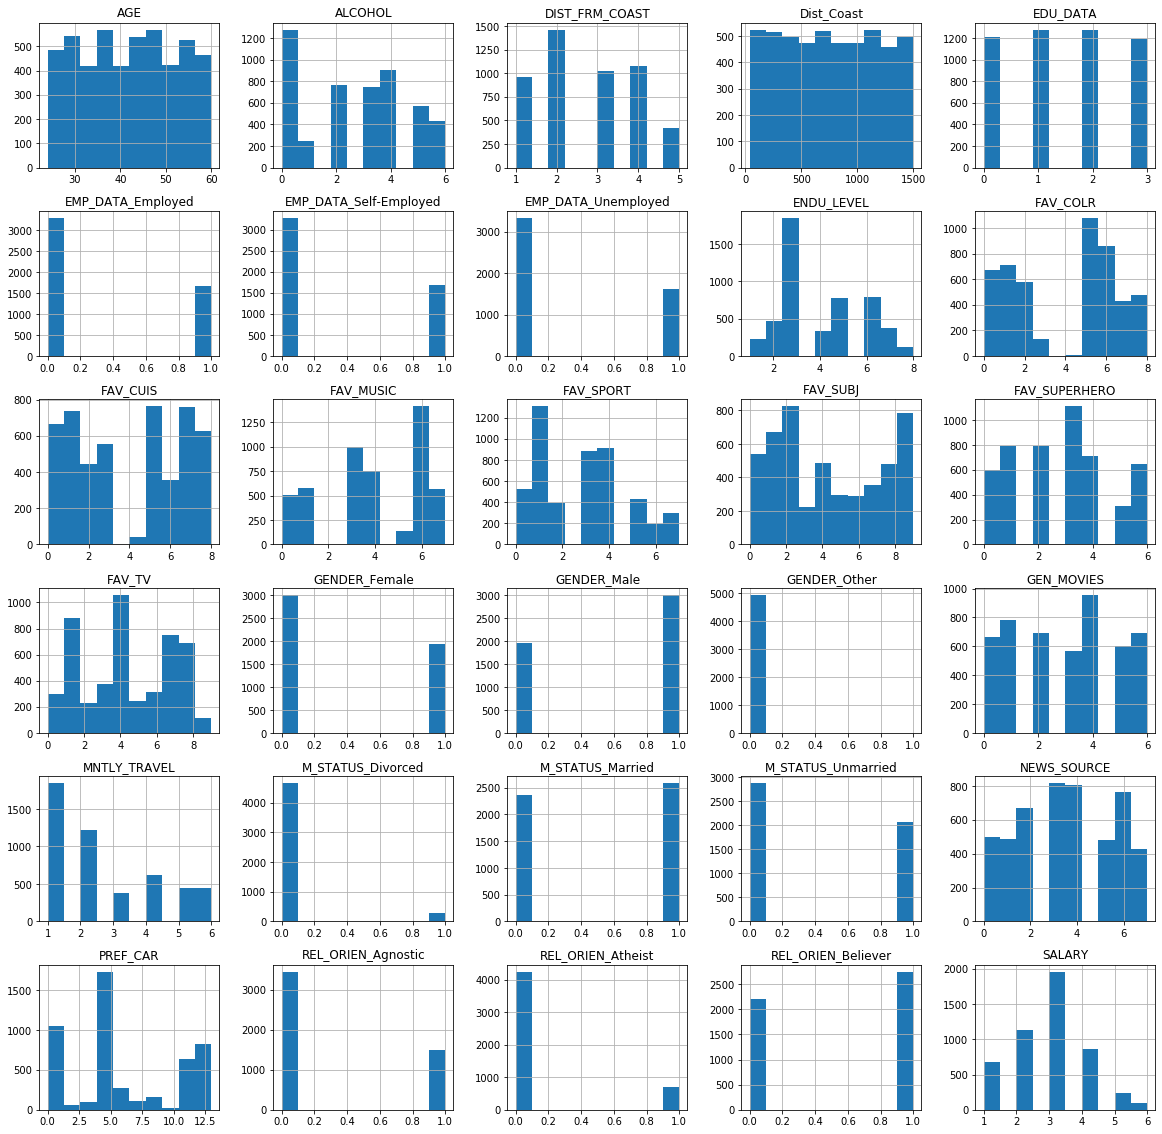

In [13]:
X.hist(figsize=[20,20])

## Preparing target

In [14]:
def encode_class(x):
    if x == 'x':
        return 1
    elif x == 'y':
        return 0
    else:
        return x

In [15]:
y = [encode_class(x) for x in y]

In [16]:
y = pd.DataFrame(y)

Scaling data

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X= scaler.fit_transform(X)

## Training

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

models = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier(), LinearDiscriminantAnalysis(), SVC()]

for model in models:
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    print(model.__class__.__name__)
    print(confusion_matrix(preds,y_test))
    print("Accuracy: ",accuracy_score(preds,y_test))
    print()

C:\Users\christopher.owen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\christopher.owen\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


LogisticRegression
[[335 297]
 [181 178]]
Accuracy:  0.5176589303733602

DecisionTreeClassifier
[[266 231]
 [250 244]]
Accuracy:  0.5146316851664985

KNeighborsClassifier
[[275 228]
 [241 247]]
Accuracy:  0.5267406659939455



C:\Users\christopher.owen\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


RandomForestClassifier
[[281 263]
 [235 212]]
Accuracy:  0.49747729566094856

LinearDiscriminantAnalysis
[[332 296]
 [184 179]]
Accuracy:  0.515640766902119



C:\Users\christopher.owen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\christopher.owen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC
[[299 266]
 [217 209]]
Accuracy:  0.5126135216952573

